# Capstone-The Battle of the Neighborhoods

  
# Table of contents

     1.Introduction: Business Problem  
     2.Data  
     3.Methodology  
     4.Analysis    
     5.Results and Discussion  
     6.Conclusion  

## Introduction: Business Problem
    
This project aims to select the safest borough in London based on the total crimes, explore the neighborhoods of that borough to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering.

This report will be targeted to people who are looking to relocate to London. Inorder to finalise a neighborhood to hunt for an apartment, safety is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The crime statistics will provide an insight into this issue.

We will focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

## Data 
Based on definition of our problem, factors that will influence our decision are:

1.The total number of crimes commited in each of the borough during the last year.

2.The most common venues in each of the neighborhood in the safest borough selected.

Following data sources will be needed to extract/generate the required 

1. ##### Preprocessing URL: https://www.kaggle.com/jboysen/london-crime
  +  A dataset consisting of the crime statistics of each borough in London obtained from Kaggle.
    
2. ##### Scraping URL: https://en.wikipedia.org/wiki/List_of_London_boroughs
  +  More information regarding the boroughs of London is scraped using the Beautifulsoup library.
    
3. ##### The list of Neighborhoods in the Royal Borough of Kingston upon Thames was found on a wikipedia page
    + URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
   


## Preprocessing :
### A real world data set from Kaggle showing the London Crimes from 2008 to 2016
London Crime Data

About this file

 + lsoa_code: code for Lower Super Output Area in Greater London.
 + borough: Common name for London borough.
 + major_category: High level categorization of crime
 + minor_category: Low level categorization of crime within major category.
 + value: monthly reported count of categorical crime in given borough
 + year: Year of reported counts, 2008-2016
 + month: Month of reported counts, 1-12

Data set URL: https://www.kaggle.com/jboysen/london-crime

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'QLOQMX2RSNWVP5GULP4S4UZRNCGPF5TY2231DCOAEM1G32SN' # your Foursquare ID
CLIENT_SECRET = 'UWQAOY1HEIDSTFOUSSQXYXOICIYO5TWP2JQ15GGYIXPN5N3G' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QLOQMX2RSNWVP5GULP4S4UZRNCGPF5TY2231DCOAEM1G32SN
CLIENT_SECRET:UWQAOY1HEIDSTFOUSSQXYXOICIYO5TWP2JQ15GGYIXPN5N3G


## Read data

In [3]:
#read data
df = pd.read_csv('C:/Users/bnaya/Desktop/Projects/capstone/london_crime_by_lsoa.csv')
df.head


<bound method NDFrame.head of          lsoa_code                 borough               major_category  \
0        E01001116                 Croydon                     Burglary   
1        E01001646               Greenwich  Violence Against the Person   
2        E01000677                 Bromley  Violence Against the Person   
3        E01003774               Redbridge                     Burglary   
4        E01004563              Wandsworth                      Robbery   
5        E01001320                  Ealing           Theft and Handling   
6        E01001342                  Ealing  Violence Against the Person   
7        E01002633                Hounslow                      Robbery   
8        E01003496                  Newham              Criminal Damage   
9        E01004177                  Sutton           Theft and Handling   
10       E01001985                Haringey           Theft and Handling   
11       E01003076                 Lambeth  Violence Against the Perso

In [4]:
# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['year'] != 2016], inplace = True)

# Removing all the entires where crime values are null  
df = df[df.value != 0]

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [5]:
df.shape

(30501, 7)

In [6]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


Accessing the most recent crime rates (2016)

In [7]:
df.columns = ['Code', 'Borough','Major','Minor','Crimes','Year','Month']
df.head()

,Code,Borough,Major,Minor,Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [8]:
df.info

<bound method DataFrame.info of             Code                 Borough                        Major  \
0      E01004177                  Sutton           Theft and Handling   
1      E01000733                 Bromley              Criminal Damage   
2      E01003989               Southwark           Theft and Handling   
3      E01002276                Havering                     Burglary   
4      E01003674               Redbridge                        Drugs   
5      E01004750             Westminster           Theft and Handling   
6      E01001902  Hammersmith and Fulham                        Drugs   
7      E01002822  Kensington and Chelsea           Theft and Handling   
8      E01002365                Havering  Violence Against the Person   
9      E01033463                   Brent           Theft and Handling   
10     E01001898  Hammersmith and Fulham           Theft and Handling   
11     E01002724               Islington                     Burglary   
12     E01002835  K

In [9]:
df['Borough'].value_counts()

Lambeth                   1401
Southwark                 1279
Newham                    1250
Croydon                   1218
Tower Hamlets             1191
Ealing                    1189
Brent                     1150
Hackney                   1147
Barnet                    1113
Haringey                  1110
Lewisham                  1088
Enfield                   1068
Wandsworth                1041
Westminster               1019
Greenwich                 1015
Camden                    1012
Islington                  988
Hillingdon                 982
Hounslow                   959
Waltham Forest             957
Redbridge                  910
Bromley                    896
Hammersmith and Fulham     829
Kensington and Chelsea     778
Havering                   751
Barking and Dagenham       730
Bexley                     650
Merton                     647
Harrow                     640
Sutton                     538
Richmond upon Thames       528
Kingston upon Thames       419
City of 

In [10]:
df['Major'].value_counts()

Theft and Handling             9959
Violence Against the Person    9704
Criminal Damage                3745
Burglary                       3351
Drugs                          1732
Robbery                        1111
Other Notifiable Offences       899
Name: Major, dtype: int64

In [11]:
df['Minor'].value_counts()

Harassment                                2803
Other Theft                               2571
Common Assault                            2479
Theft From Motor Vehicle                  2275
Assault with Injury                       2253
Burglary in a Dwelling                    2111
Theft/Taking Of Motor Vehicle             1516
Possession Of Drugs                       1489
Criminal Damage To Motor Vehicle          1411
Wounding/GBH                              1250
Burglary in Other Buildings               1240
Personal Property                         1004
Other Criminal Damage                     1003
Other Theft Person                         998
Theft/Taking of Pedal Cycle                895
Criminal Damage To Dwelling                884
Theft From Shops                           868
Other Notifiable                           849
Motor Vehicle Interference & Tampering     730
Other violence                             574
Criminal Damage To Other Building          447
Offensive Wea

In [12]:
df['Code'].value_counts()

E01004736    30
E01033583    30
E01003047    29
E01003617    27
E01033595    24
E01000863    24
E01000675    24
E01002695    22
E01001748    21
E01000023    21
E01004734    21
E01032722    21
E01003318    21
E01003215    21
E01003689    21
E01000141    21
E01001429    21
E01002711    20
E01000855    20
E01001899    20
E01004761    20
E01002506    20
E01033708    20
E01001615    20
E01001734    19
E01004509    19
E01004215    19
E01004397    19
E01033589    19
E01004763    19
             ..
E01002946     1
E01002170     1
E01003422     1
E01000357     1
E01002061     1
E01004554     1
E01003824     1
E01000828     1
E01000353     1
E01002556     1
E01003746     1
E01002656     1
E01004488     1
E01000179     1
E01001725     1
E01002244     1
E01003847     1
E01002431     1
E01000763     1
E01003960     1
E01003365     1
E01000999     1
E01001421     1
E01000207     1
E01004637     1
E01002476     1
E01000539     1
E01000659     1
E01003813     1
E01000841     1
Name: Code, Length: 4772

#### Pivoting the table to view the no. of crimes for each major category in each Borough

In [13]:
London_crime = pd.pivot_table(df,values=['Crimes'],
                               index=['Borough'],
                               columns=['Major'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

Crimes                                                  \
Major                Burglary Criminal Damage Drugs Other Notifiable Offences   
Borough                                                                         
Barking and Dagenham      112             147    65                        30   
Barnet                    264             181    62                        43   
Bexley                     77             140    62                        18   
Brent                     213             180   145                        41   
Bromley                   159             152    59                        34   

                                                                             
Major                Robbery Theft and Handling Violence Against the Person  
Borough                                                                      
Barking and Dagenham      35                380                         460  
Barnet                    29                720                         583  
Bexley                    10                357                         354  
Brent                     59                689                         687  
Bromley                   25                557                         486

In [14]:
# Reset the index
London_crime.reset_index(inplace = True)

In [15]:
# Total crimes per Borough
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

Borough   Crimes                        \
Major                         Burglary Criminal Damage Drugs   
0        Barking and Dagenham      112             147    65   
1                      Barnet      264             181    62   
2                      Bexley       77             140    62   
3                       Brent      213             180   145   
4                     Bromley      159             152    59   
5                      Camden      210             177   178   
6              City of London        0               0     1   
7                     Croydon      158             245    99   
8                      Ealing      175             215    96   
9                     Enfield      186             133    90   
10                  Greenwich      152             197    77   
11                    Hackney      197             140   128   
12     Hammersmith and Fulham       99             153    89   
13                   Haringey      173             154   131   
14                     Harrow      118             104    37   
15                   Havering      147             107    67   
16                 Hillingdon      176             179   101   
17                   Hounslow      161             160    91   
18                  Islington      191             145   160   
19     Kensington and Chelsea      106              93   150   
20       Kingston upon Thames       75              80    40   
21                    Lambeth      240             196   255   
22                   Lewisham      166             174    93   
23                     Merton      112             106    21   
24                     Newham      178             211   155   
25                  Redbridge      144             108    75   
26       Richmond upon Thames      104             102    16   
27                  Southwark      237             214   149   
28                     Sutton       87             104    31   
29              Tower Hamlets      222             179   140   
30             Waltham Forest      151             139    75   
31                 Wandsworth      214             153    60   
32                Westminster      203             208   176   

                                                            \
Major Other Notifiable Offences Robbery Theft and Handling   
0                            30      35                380   
1                            43      29                720   
2                            18      10                357   
3                            41      59                689   
4                            34      25                557   
5                            34      77                930   
6                             0       2                  5   
7                            53      67                789   
8                            41      64                767   
9                            43      60                625   
10                           28      45                600   
11                           38      85                890   
12                           28      26                807   
13                           47      81                839   
14                           22      24                369   
15                           34      21                459   
16                           35      46                659   
17                           47      24                600   
18                           56      68                813   
19                           21      40                830   
20                           14       4                260   
21                           51      98               1037   
22                           28      82                553   
23                           23      21                426   
24                           57      98               1184   
25                           32      53                642   
26                           12       4      

#### Removing the multi index so that it will be easier to merge

In [16]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,CrimesBurglary,CrimesCriminal Damage,CrimesDrugs,CrimesOther Notifiable Offences,CrimesRobbery,CrimesTheft and Handling,CrimesViolence Against the Person,Total
0,Barking and Dagenham,112,147,65,30,35,380,460,1229
1,Barnet,264,181,62,43,29,720,583,1882
2,Bexley,77,140,62,18,10,357,354,1018
3,Brent,213,180,145,41,59,689,687,2014
4,Bromley,159,152,59,34,25,557,486,1472


#### Renaming the columns

In [17]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,112,147,65,30,35,380,460,1229
1,Barnet,264,181,62,43,29,720,583,1882
2,Bexley,77,140,62,18,10,357,354,1018
3,Brent,213,180,145,41,59,689,687,2014
4,Bromley,159,152,59,34,25,557,486,1472


In [18]:
London_crime.shape

(33, 9)

## scraping
url=https://en.wikipedia.org/wiki/List_of_London_boroughs  
+ Scraping additional information of the different Boroughs in London from a Wikipedia page   
+ Using Beautiful soup to scrap the latitude and longitiude of the boroughs in London

In [19]:
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@Dj9wpAMNUAA8HuBD8AAACI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":994741741,"wgRevisionId":994741741,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates"

In [20]:
# extracting the raw table inside that webpage
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Ha

#### Table to Data frame

In [21]:
London_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [22]:
# Read in the second table 
London_table1 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

# Rename the columns to match the previous table to append the tables.

London_table1.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

# View the table
London_table1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


#### Append the data frame together

In [23]:
# A continuous index value will be maintained 
# across the rows in the new appended data frame. 

London_table = London_table.append(London_table1, ignore_index = True) 
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Check if the last row was appended correctly

In [24]:
London_table.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


View the information of the data set

In [25]:
London_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
Borough                     33 non-null object
Inner                       4 non-null object
Status                      5 non-null object
Local authority             33 non-null object
Political control           33 non-null object
Headquarters                33 non-null object
Area (sq mi)                33 non-null float64
Population (2013 est)[1]    33 non-null int64
Co-ordinates                33 non-null object
Nr. in map                  33 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ KB


Removing Unnecessary string in the Data set

In [26]:
London_table = London_table.replace('note 1','', regex=True) 
London_table = London_table.replace('note 2','', regex=True) 
London_table = London_table.replace('note 3','', regex=True) 
London_table = London_table.replace('note 4','', regex=True) 
London_table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Check the type of the newly created table

In [27]:
type(London_table)

pandas.core.frame.DataFrame

In [28]:
London_table.shape

(33, 10)

Check if the Borough in both the data frames match.

In [29]:
set(df.Borough) - set(London_table.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

Find the index of the Boroughs that didn't match

In [30]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is [0]
The index of second borough is [9]
The index of third borough is [11]


Changing the Borough names to match the other data frame

In [31]:
London_table.iloc[0,0] = 'Barking and Dagenham'
London_table.iloc[9,0] = 'Greenwich'
London_table.iloc[11,0] = 'Hammersmith and Fulham'

In [32]:
set(df.Borough) - set(London_table.Borough)

set()

Check if the Borough names in both data sets match

lets compare both table

In [33]:
Ld_crime = pd.merge(London_crime, London_table, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,112,147,65,30,35,380,460,1229,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,264,181,62,43,29,720,583,1882,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,77,140,62,18,10,357,354,1018,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,213,180,145,41,59,689,687,2014,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,159,152,59,34,25,557,486,1472,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,210,177,178,34,77,930,634,2240,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,City of London,0,0,1,0,2,5,1,9,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
7,Croydon,158,245,99,53,67,789,794,2205,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
8,Ealing,175,215,96,41,64,767,762,2120,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
9,Enfield,186,133,90,43,60,625,598,1735,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30


In [34]:
Ld_crime.shape

(33, 18)

In [35]:
set(df.Borough) - set(Ld_crime.Borough)

set()

In [36]:
# List of Column names of the data frame 
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Other Notifiable Offences',
 'Robbery',
 'Theft and Handling',
 'Violence Against the Person',
 'Total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [37]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,".mw-parser-output .geo-default,.mw-parser-outp...",112,147,65,30,35,380,460,1229
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,264,181,62,43,29,720,583,1882
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,77,140,62,18,10,357,354,1018
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,213,180,145,41,59,689,687,2014
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,159,152,59,34,25,557,486,1472


## Methodology 
The methodology in this project consists of two parts:

   + Exploratory Data Analysis: Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.
   + Modelling: To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

### Exploratory Data Analysis 

#### Descriptive statistics of the data¶

In [38]:
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,157.787879,150.787879,96.181818,35.424242,50.242424,693.303030,551.878788,1735.606061
std,56.646247,49.085230,55.441103,15.960949,31.826709,356.684514,203.826942,700.219427
min,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,9.000000
25%,112.000000,108.000000,62.000000,23.000000,24.000000,459.000000,460.000000,1321.000000
50%,161.000000,153.000000,90.000000,34.000000,48.000000,659.000000,583.000000,1770.000000
75%,197.000000,180.000000,140.000000,47.000000,68.000000,839.000000,714.000000,2200.000000
max,264.000000,245.000000,255.000000,75.000000,123.000000,2054.000000,893.000000,3732.000000


In [39]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


Check if the column names are strings

In [40]:
Ld_crime.columns = list(map(str, Ld_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Ld_crime.columns)

True

Sort the total crimes in descenting order to see 5 boroughs with the highest number of crimes

In [41]:
Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Ld_crime.head() 
df_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,203,208,176,75,123,2054,893,3732
21,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,240,196,255,51,98,1037,856,2733
24,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,178,211,155,57,98,1184,714,2597
27,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,237,214,149,52,57,1028,732,2469
29,Tower Hamlets,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,222,179,140,52,104,927,680,2304


Visualize the five boroughs with the highest number of crimes

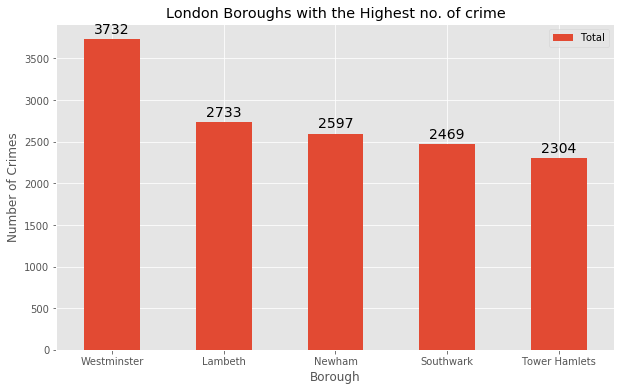

In [42]:
df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

Sort the total crimes in ascending order to see 5 boroughs with the highest number of crimes

In [43]:
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Ld_crime.head() 
df_bot5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,0,0,1,0,2,5,1,9
20,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,75,80,40,14,4,260,231,704
26,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,104,102,16,12,4,327,233,798
28,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,87,104,31,13,15,277,315,842
14,Harrow,Harrow London Borough Council,Labour,"Civic Centre, Station Road",19.49,243372,51°35′23″N 0°20′05″W﻿ / ﻿51.5898°N 0.3346°W,118,104,37,22,24,369,306,980


Visualize the five boroughs with the least number of crimes

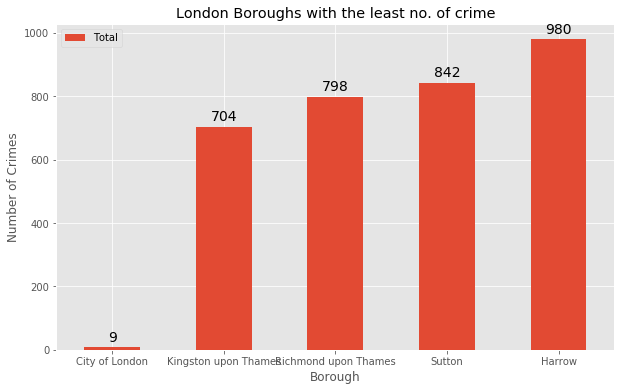

In [44]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [45]:
df_col = df_bot5[df_bot5['Borough'] == 'City of London']
df_col = df_col[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_col

,Borough,Total,Area (sq mi),Population (2013 est)[1]
6,City of London,9,1.12,7000


As per the wikipedia page, The City of London is the 33rd principal division of Greater London but it is not a London borough.

URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

Hence we will focus on the next borough with the least crime i.e. Kingston upon Thames


Visualizing different types of crimes in the borough 'Kingston upon Thames'

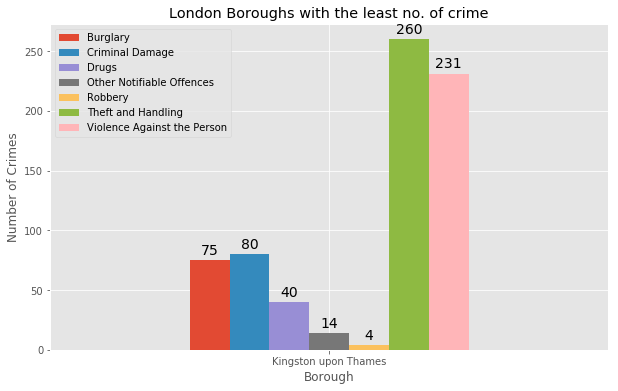

In [46]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

#### Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates. ¶

##### The list of Neighborhoods in the Royal Borough of Kingston upon Thames was found on a wikipedia page: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames

In [47]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [48]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [49]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


Get the co-ordinates of Berrylands, London, United Kingdom (The center neighborhood of Kingston upon Thames)

In [50]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


Visualize the Neighborhood of Kingston upon Thames Borough

In [51]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

## Modelling 

  + Finding all the venues within a 500 meter radius of each neighborhood.
  + Perform one hot ecoding on the venues data.
  + Grouping the venues by the neighborhood and calculating their mean.
  + Performing a K-means clustering (Defining K = 5)

#### Create a function to extract the venues from each Neighborhood

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [54]:
print(kut_venues.shape)
kut_venues.head()

(172, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Berrylands,51.393781,-0.284802,Cafe Rosa,51.390175,-0.282490,Café
4,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park


In [55]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,4,4,4,4,4,4
Canbury,14,14,14,14,14,14
Coombe,1,1,1,1,1,1
Hook,5,5,5,5,5,5
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4
New Malden,7,7,7,7,7,7


In [56]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 69 uniques categories.


In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### One hot encoding

URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [58]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Coombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,Hook,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston Vale,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kingston upon Thames,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,...,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.000000
6,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Motspur Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,New Malden,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
9,Norbiton,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,...,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037


In [60]:
kut_grouped.shape

(14, 70)

In [61]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0              Bus Stop  0.25
1  Gym / Fitness Center  0.25
2                  Park  0.25
3                  Café  0.25
4      Asian Restaurant  0.00


----Canbury----
                  venue  freq
0                   Pub  0.29
1           Supermarket  0.07
2  Gym / Fitness Center  0.07
3     Fish & Chips Shop  0.07
4                  Park  0.07


----Coombe----
               venue  freq
0           Tea Room   1.0
1   Asian Restaurant   0.0
2  Korean Restaurant   0.0
3        Pizza Place   0.0
4           Pharmacy   0.0


----Hook----
               venue  freq
0                Pub   0.2
1             Bakery   0.2
2  Indian Restaurant   0.2
3  Fish & Chips Shop   0.2
4        Supermarket   0.2


----Kingston Vale----
            venue  freq
0   Grocery Store  0.25
1    Soccer Field  0.25
2             Bar  0.25
3  Sandwich Place  0.25
4     Pizza Place  0.00


----Kingston upon Thames----
              venue  freq
0       Coffee Shop  0

#### Create a data frame of the venues

Function to sort the venues in descending order.

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Café,Bus Stop,Wine Shop,Fast Food Restaurant,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop
1,Canbury,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Gym / Fitness Center,Plaza,Café,Hotel
2,Coombe,Tea Room,Wine Shop,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food
3,Hook,Fish & Chips Shop,Bakery,Pub,Supermarket,Indian Restaurant,Wine Shop,Department Store,Discount Store,Electronics Store,Farmers Market
4,Kingston Vale,Grocery Store,Sandwich Place,Bar,Soccer Field,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant


## Clustering similar neighborhoods together using k - means clustering¶

In [64]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 3, 0, 0, 0, 0, 2, 0, 0])

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,1.0,Gym / Fitness Center,Park,Café,Bus Stop,Wine Shop,Fast Food Restaurant,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0.0,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Gym / Fitness Center,Plaza,Café,Hotel
2,Chessington,Kingston upon Thames,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,Kingston upon Thames,51.419450,-0.265398,3.0,Tea Room,Wine Shop,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food
4,Hook,Kingston upon Thames,51.367898,-0.307145,0.0,Fish & Chips Shop,Bakery,Pub,Supermarket,Indian Restaurant,Wine Shop,Department Store,Discount Store,Electronics Store,Farmers Market


In [66]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            14 non-null float64
1st Most Common Venue     14 non-null object
2nd Most Common Venue     14 non-null object
3rd Most Common Venue     14 non-null object
4th Most Common Venue     14 non-null object
5th Most Common Venue     14 non-null object
6th Most Common Venue     14 non-null object
7th Most Common Venue     14 non-null object
8th Most Common Venue     14 non-null object
9th Most Common Venue     14 non-null object
10th Most Common Venue    14 non-null object
dtypes: float64(3), object(12)
memory usage: 1.8+ KB


In [67]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [68]:
kut_merged.shape

(14, 15)

In [69]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [70]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              14 non-null object
Borough                   14 non-null object
Latitude                  14 non-null float64
Longitude                 14 non-null float64
Cluster Labels            14 non-null int32
1st Most Common Venue     14 non-null object
2nd Most Common Venue     14 non-null object
3rd Most Common Venue     14 non-null object
4th Most Common Venue     14 non-null object
5th Most Common Venue     14 non-null object
6th Most Common Venue     14 non-null object
7th Most Common Venue     14 non-null object
8th Most Common Venue     14 non-null object
9th Most Common Venue     14 non-null object
10th Most Common Venue    14 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 1.7+ KB


## Visualize the clusters

In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Analysis 
Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

In [72]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Gym / Fitness Center,Plaza,Café,Hotel
4,Hook,Kingston upon Thames,51.367898,-0.307145,0,Fish & Chips Shop,Bakery,Pub,Supermarket,Indian Restaurant,Wine Shop,Department Store,Discount Store,Electronics Store,Farmers Market
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Coffee Shop,Café,Sushi Restaurant,Burger Joint,Pub,Asian Restaurant,Portuguese Restaurant,French Restaurant,German Restaurant,Gym / Fitness Center
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,0,Grocery Store,Sandwich Place,Bar,Soccer Field,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,0,Grocery Store,Garden Center,Pub,Restaurant,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store,Fast Food Restaurant
9,New Malden,Kingston upon Thames,51.405335,-0.263407,0,Grocery Store,Sushi Restaurant,Indian Restaurant,Korean Restaurant,Supermarket,Gastropub,Bar,Beer Bar,Garden Center,Furniture / Home Store
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,0,Pub,Food,Indian Restaurant,Italian Restaurant,Platform,Wine Shop,Farmers Market,Convenience Store,Hardware Store,Hotel
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,0,Indian Restaurant,Coffee Shop,Pub,Italian Restaurant,Chinese Restaurant,Café,Restaurant,Fast Food Restaurant,Park,Gym / Fitness Center
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,0,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Pharmacy,Bakery,Train Station,Hotel,Supermarket,Thai Restaurant
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,0,Grocery Store,Pharmacy,Sandwich Place,Train Station,Hotel,Discount Store,Coffee Shop,Café,Bus Stop,Restaurant


## Examine the second cluster

In [73]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,1,Gym / Fitness Center,Park,Café,Bus Stop,Wine Shop,Fast Food Restaurant,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop


## Examine the third cluster

In [74]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,2,Gym,Park,Soccer Field,Restaurant,Wine Shop,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store


## Examine the forth cluster¶

In [75]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Coombe,Kingston upon Thames,51.41945,-0.265398,3,Tea Room,Wine Shop,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food


## Examine the fifth cluster

In [76]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Old Malden,Kingston upon Thames,51.382484,-0.25909,4,Construction & Landscaping,Train Station,Food,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Cosmetics Shop


## Results and Discussion 

The aim of this project is to help people who want to relocate to the safest borough in London,  can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.



## Conclusion 

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.